In [130]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as model
import torch.nn as nn

In [131]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [132]:
train_data = torchvision.datasets.ImageFolder('./pokemon_data',transform = transform)

In [133]:
dataloader = torch.utils.data.DataLoader(train_data,batch_size = 128,shuffle=True)


In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizing Images

In [135]:
labels = {0 : "Aerodactyl",  
1 : "Bulbasaur",  
2 : "Charmander", 
3 : "Dratini",  
4 : "Fearow",  
5 : "Mewtwo",  
6 : "Pikachu",  
7 : "Psyduck",  
8 : "Spearow",  
9 : "Squirtle"}  

In [136]:
data_iter = iter(dataloader)
images,label = data_iter.next()


In [137]:
def imshow(img):
    img= img.numpy()
    plt.imshow(np.transpose(img,[1,2,0]))
    plt.show()
    
    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


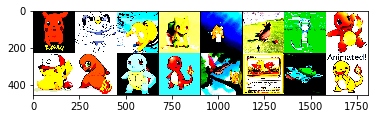

Pikachu Mewtwo Psyduck Bulbasaur Psyduck Spearow Dratini Charmander Pikachu Charmander Squirtle Charmander Spearow Spearow Bulbasaur Charmander


In [61]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(labels[label[j].item()] for j in range(16)))

# AlexNet

In [138]:
alex_net = model.alexnet(pretrained=True)
print(alex_net)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [139]:
for params in alex_net.parameters():
    params.requires_grad = False

In [140]:
in_features = alex_net.classifier[6].in_features
alex_net.classifier[6] = nn.Linear(in_features,10)
print(alex_net)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [141]:
import torch.optim as optim


In [142]:
opt = optim.Adam(alex_net.parameters(),0.005)
loss_fn = nn.CrossEntropyLoss()

epoch: 0
Iteration: 0, Loss: 2.50


/home/akansh/anaconda3/lib/python3.7/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


..............................
epoch: 1
Iteration: 0, Loss: 0.55
..............................
epoch: 2
Iteration: 0, Loss: 0.14
..............................
epoch: 3
Iteration: 0, Loss: 0.25
..............................
epoch: 4
Iteration: 0, Loss: 0.04
..............................
epoch: 5
Iteration: 0, Loss: 0.25
..............................
epoch: 6
Iteration: 0, Loss: 0.05
..............................
epoch: 7
Iteration: 0, Loss: 0.05
..............................
epoch: 8
Iteration: 0, Loss: 0.12
..............................
epoch: 9
Iteration: 0, Loss: 0.11
..............................


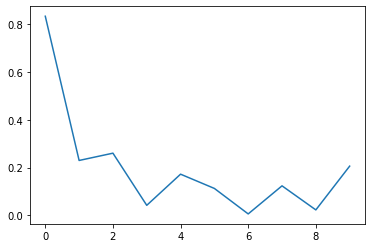

In [143]:
loss_arr = []
for epoch in range(10):
    
    print(f'epoch: {epoch}')
    for i,data in enumerate(dataloader):
        
        inputs,labels = data
        opt.zero_grad()
        outputs = alex_net(inputs)
        loss = loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        if i % 20 == 0:
            print('Iteration: %d, Loss: %0.2f' % (i, loss.item()))
    
    loss_arr.append(loss.item())
    print('..............................')
    
        
plt.plot(loss_arr)
plt.show()
        

In [144]:
def evaluation(dataloader, model):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        
        outputs = model(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [145]:
print(f'The Training Accuracy Obtained by AlexNet is: {evaluation(dataloader,alex_net)}')

The Training Accuracy Obtained by AlexNet is: 98.17295980511571


In [146]:
test_set = torchvision.datasets.ImageFolder('./images',transform = transform)

In [147]:
test_loader = torch.utils.data.DataLoader(test_set,batch_size = 1,shuffle=False)

In [148]:
classes = {0 : "Aerodactyl",  
1 : "Bulbasaur",  
2 : "Charmander", 
3 : "Dratini",  
4 : "Fearow",  
5 : "Mewtwo",  
6 : "Pikachu",  
7 : "Psyduck",  
8 : "Spearow",  
9 : "Squirtle"}  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


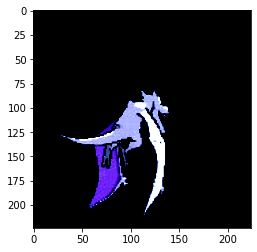

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Aerodactyl


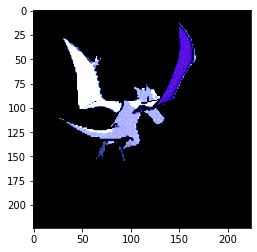

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Aerodactyl


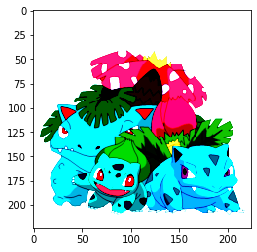

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


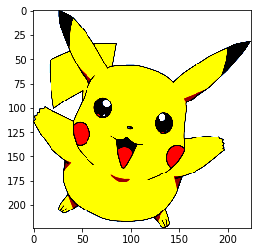

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


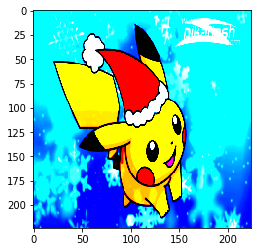

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


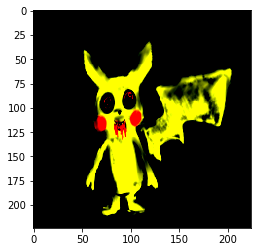

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


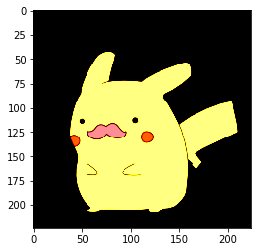

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


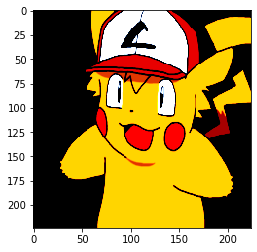

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


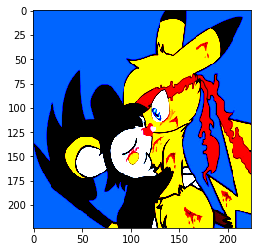

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


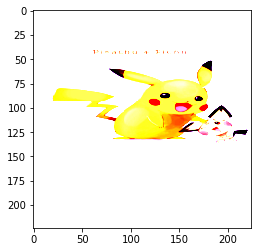

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


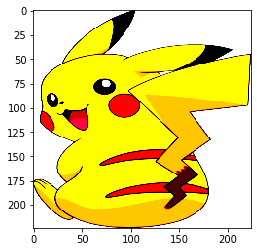

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


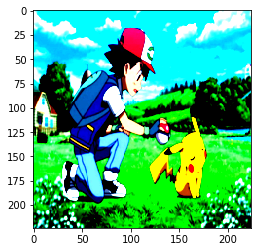

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


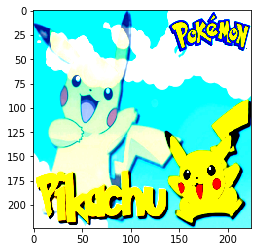

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


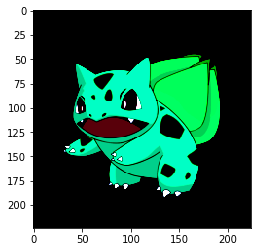

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


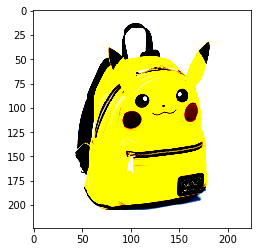

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


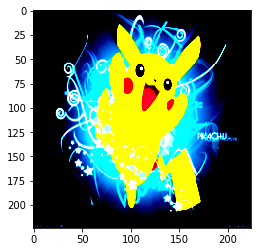

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


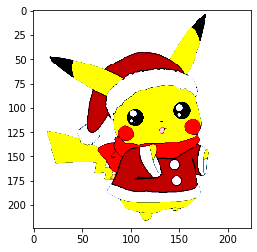

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


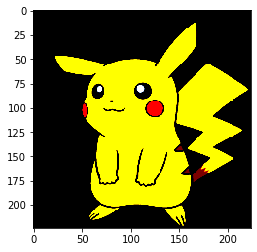

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


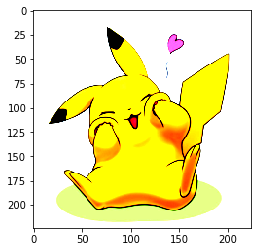

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


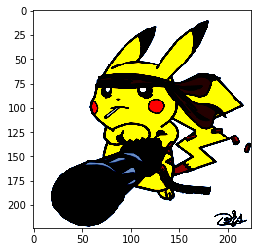

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


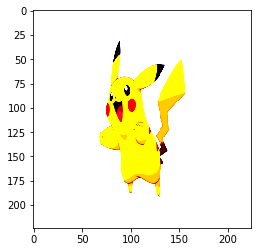

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


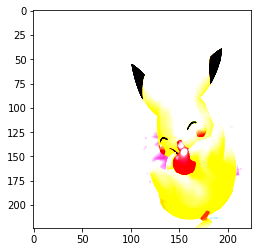

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


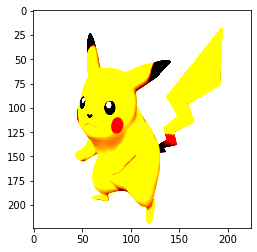

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


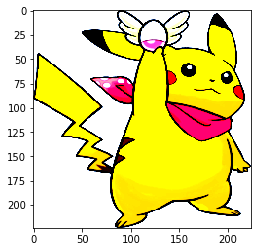

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


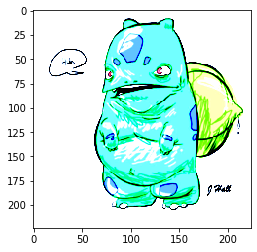

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


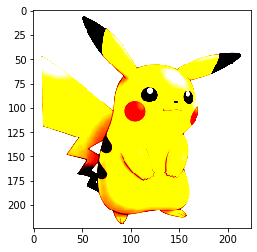

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


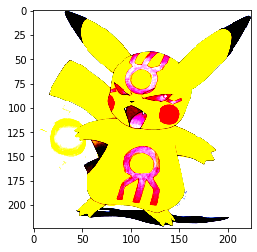

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


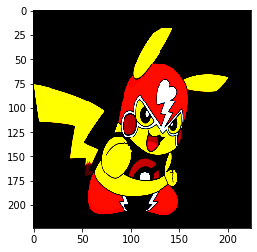

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


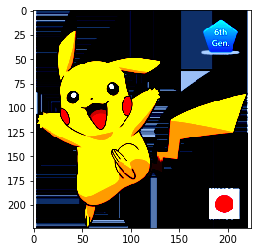

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


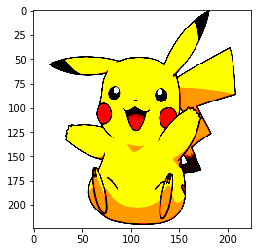

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


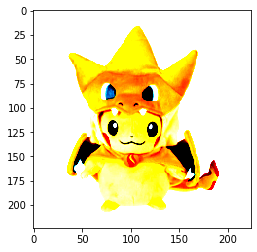

Pikachu


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


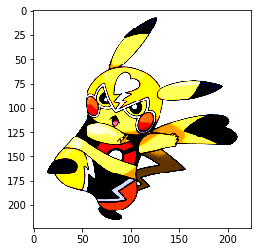

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


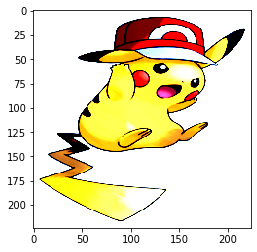

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


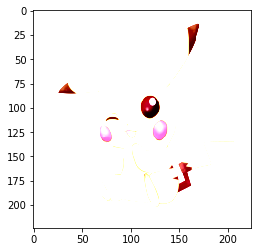

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


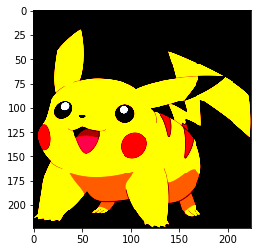

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


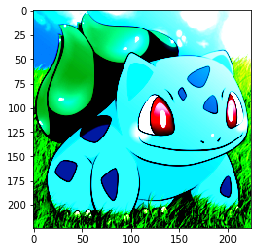

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


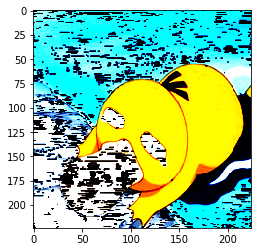

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


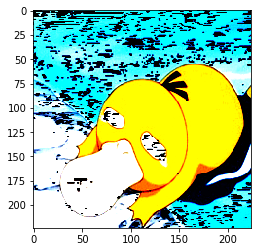

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


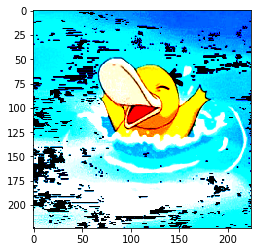

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


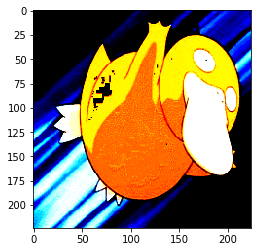

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


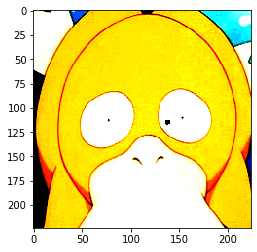

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


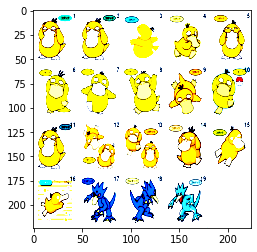

Squirtle


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


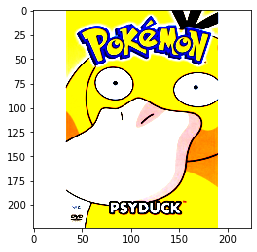

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


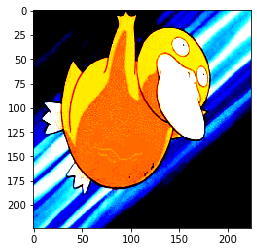

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


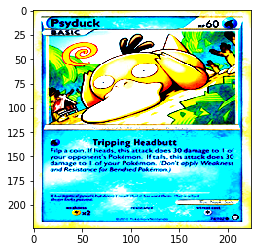

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


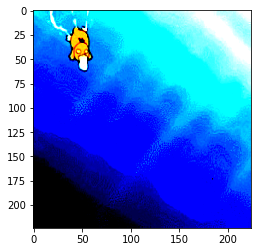

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


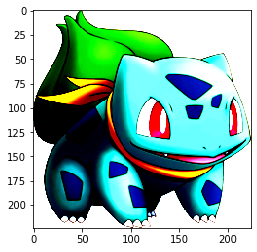

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


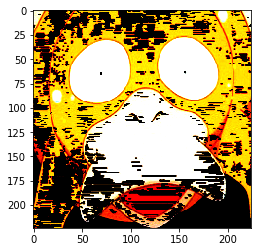

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


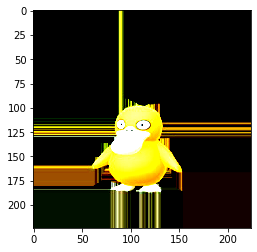

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Pikachu


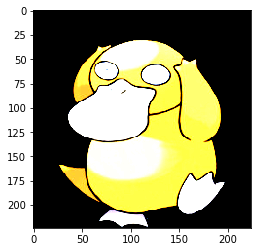

Psyduck


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


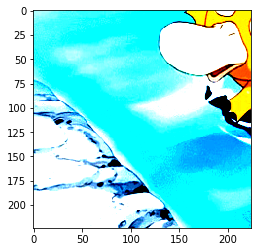

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


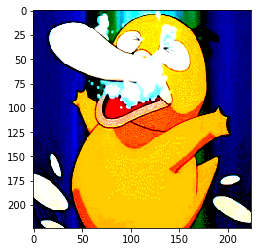

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Psyduck


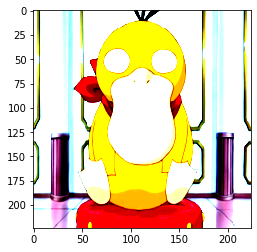

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


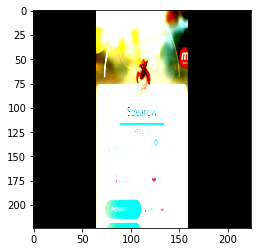

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


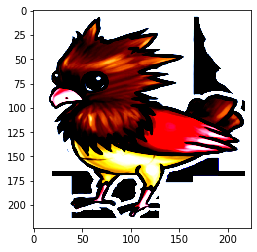

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


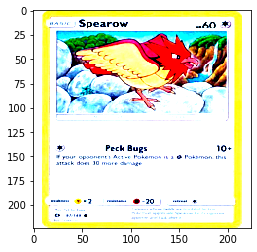

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


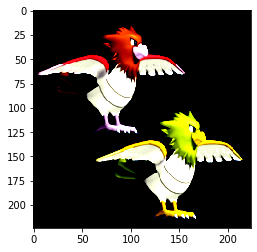

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


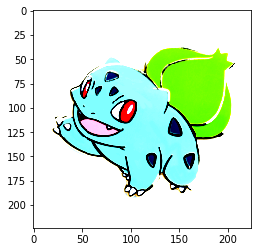

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


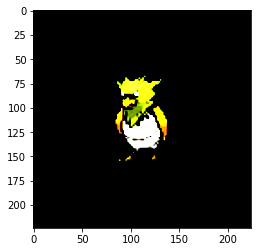

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


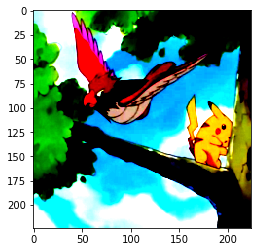

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


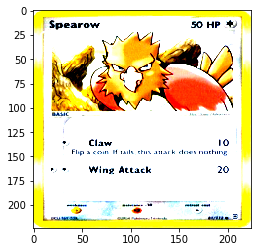

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


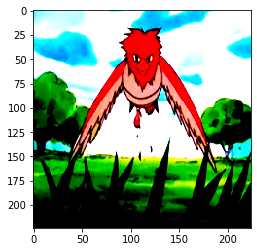

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


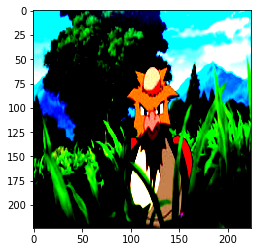

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


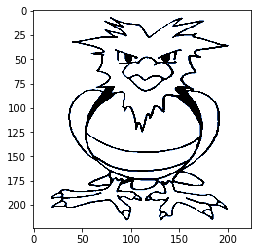

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


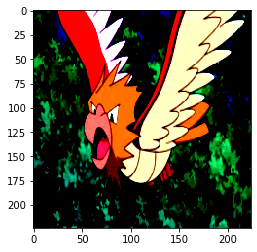

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


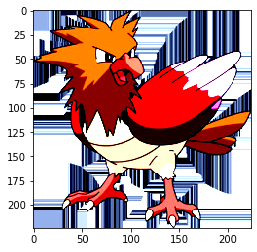

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Spearow


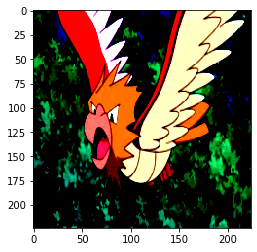

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


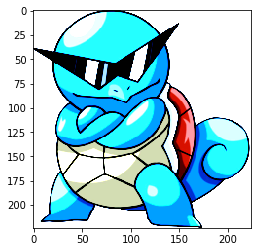

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


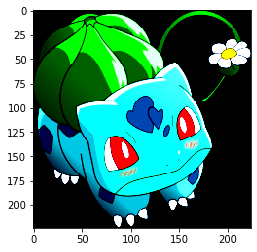

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


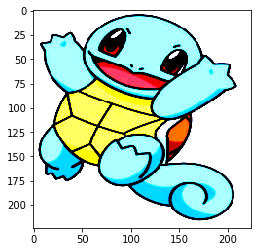

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


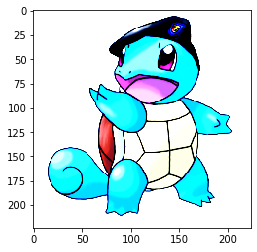

Squirtle


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


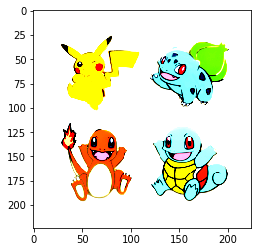

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


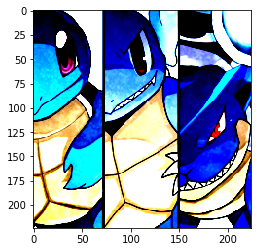

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


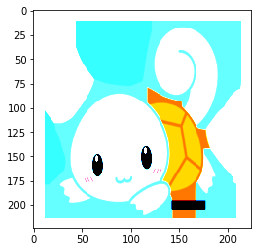

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


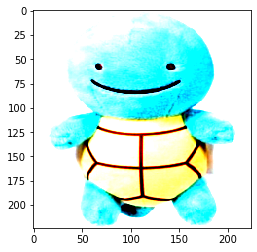

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


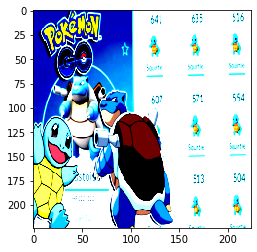

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


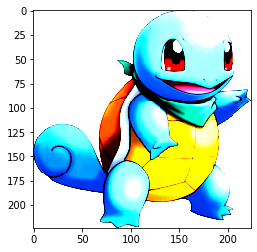

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


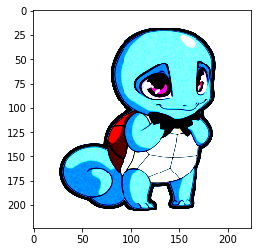

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


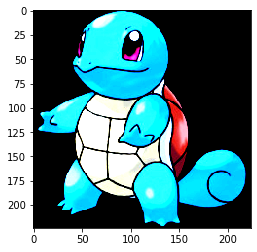

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


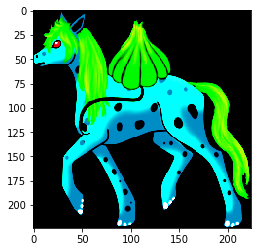

Bulbasaur


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


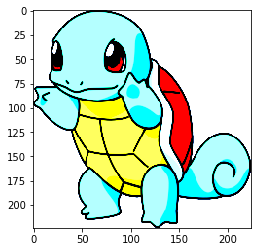

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


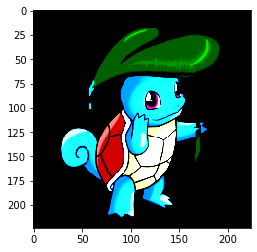

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


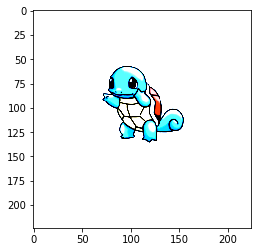

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


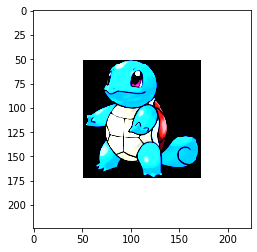

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


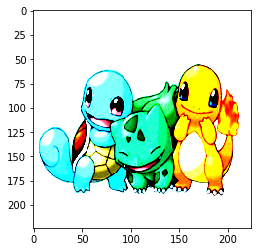

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


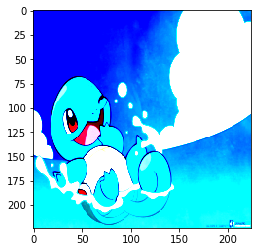

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


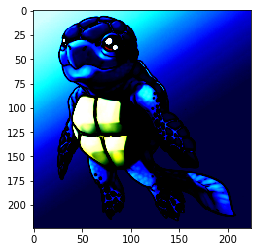

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


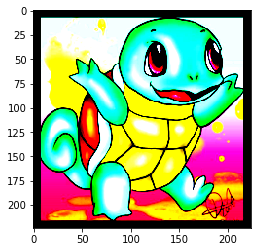

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


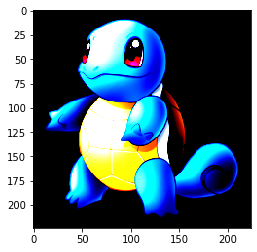

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


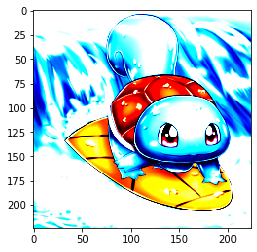

Squirtle


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


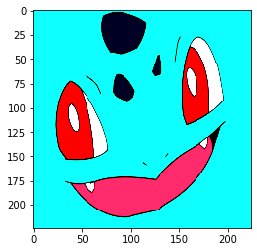

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


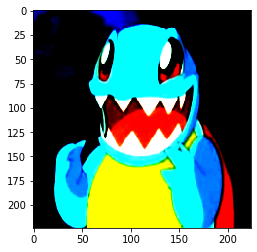

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


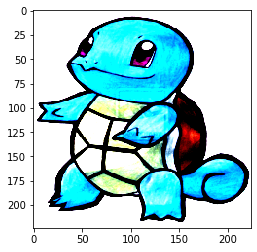

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


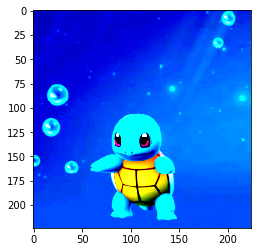

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


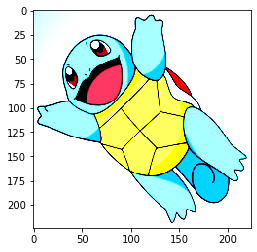

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


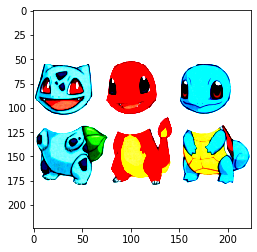

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


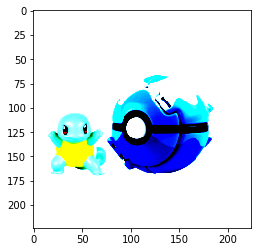

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


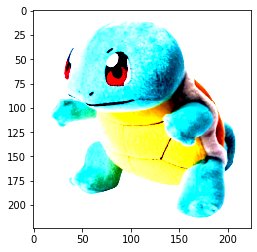

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


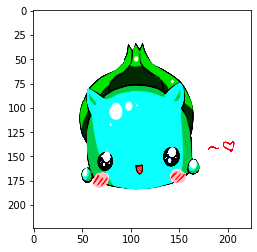

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


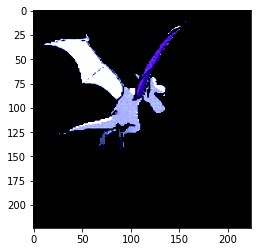

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Aerodactyl


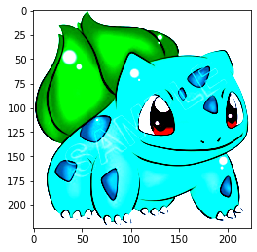

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


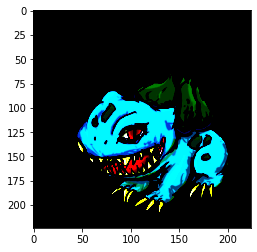

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


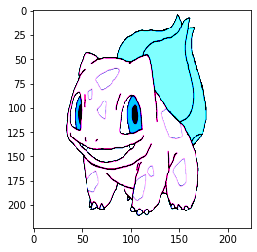

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


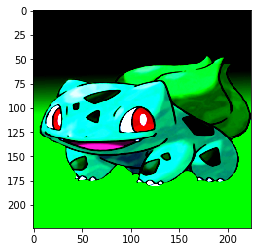

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


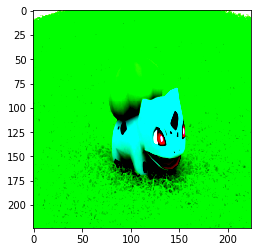

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


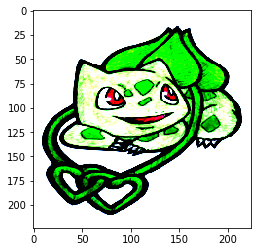

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


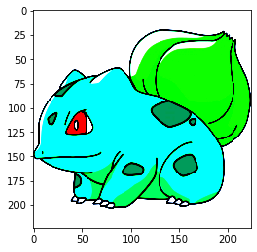

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


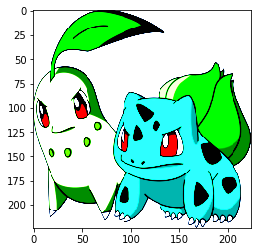

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


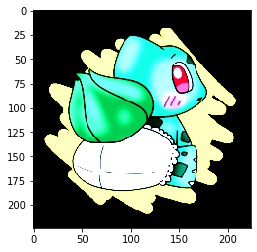

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


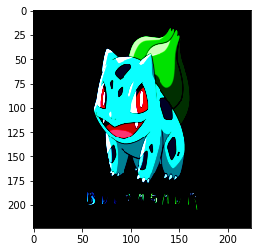

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


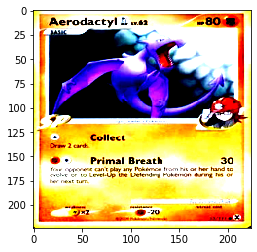

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Aerodactyl


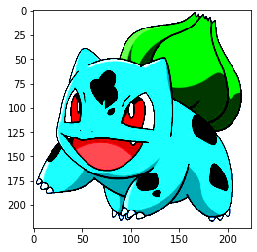

Bulbasaur


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


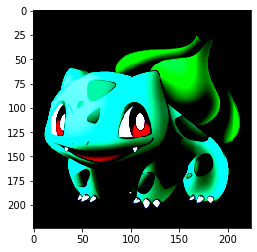

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


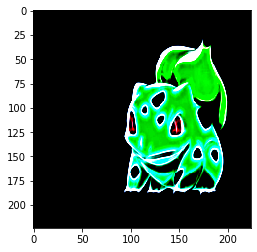

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


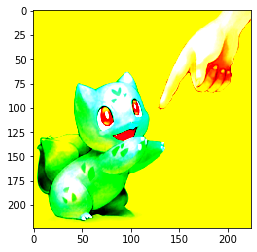

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


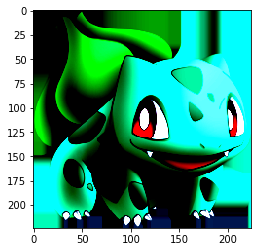

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


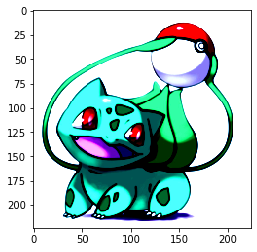

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


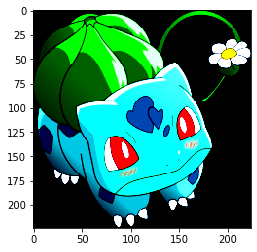

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


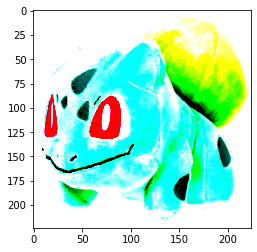

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


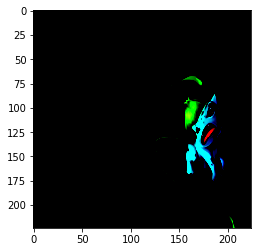

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


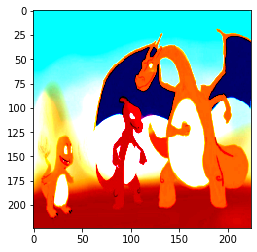

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


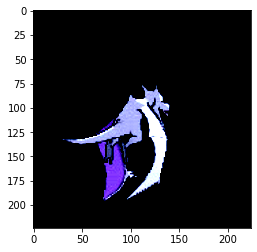

Aerodactyl


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


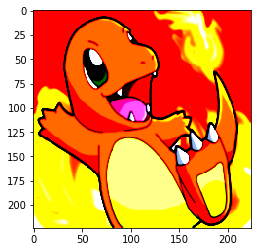

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


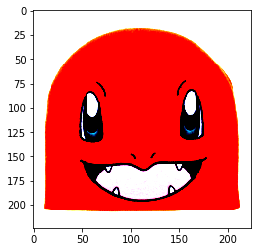

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


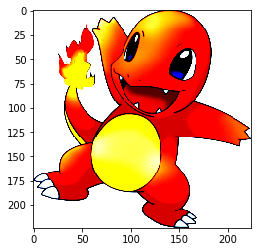

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


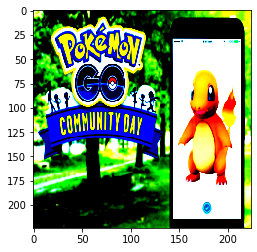

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


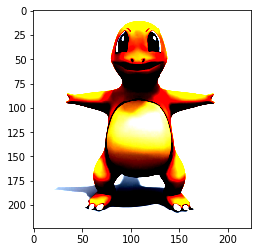

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


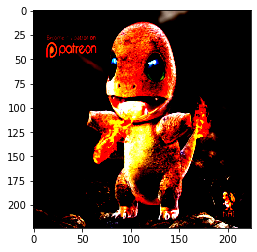

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


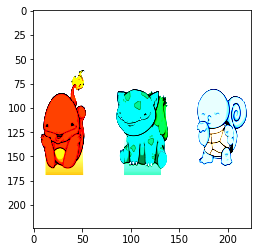

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


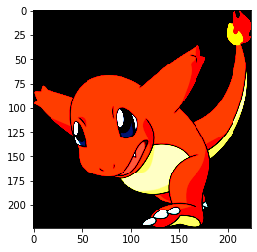

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


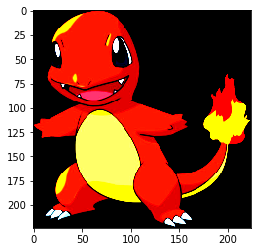

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


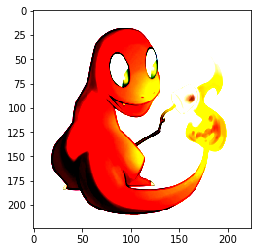

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


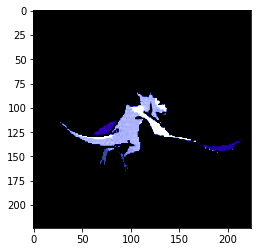

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Aerodactyl


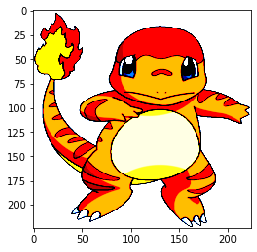

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


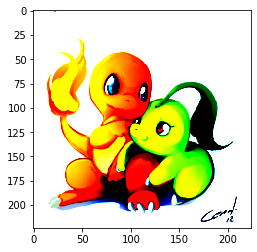

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


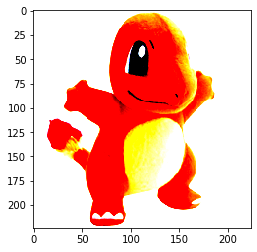

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


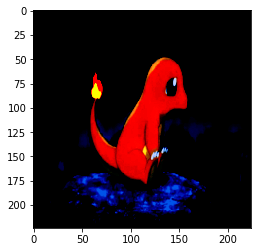

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


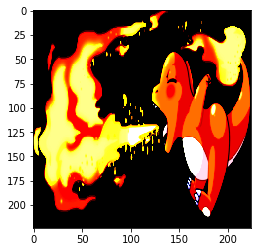

Charmander


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


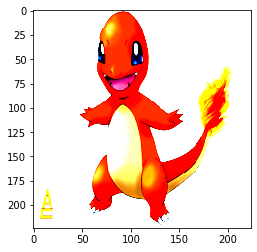

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


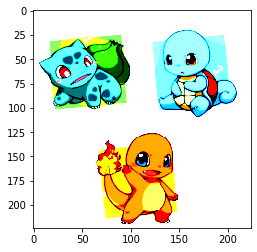

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


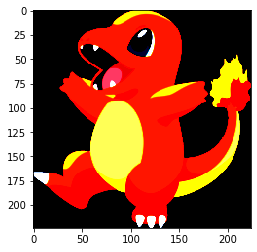

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


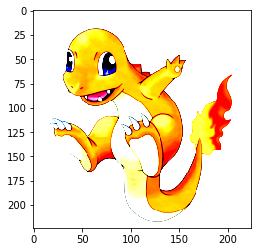

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


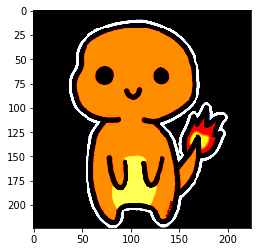

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


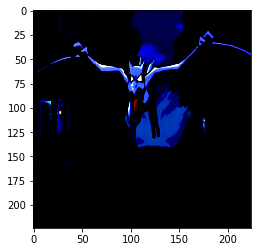

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Aerodactyl


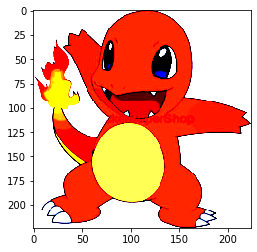

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


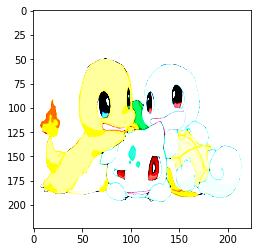

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


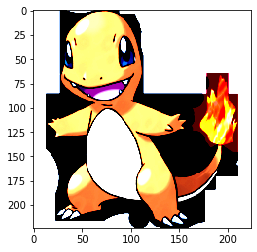

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


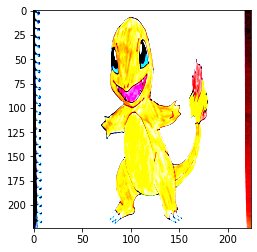

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


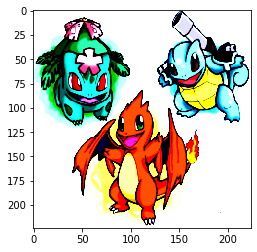

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


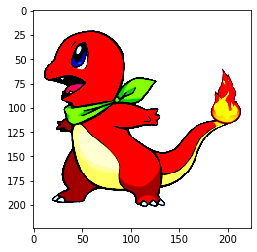

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


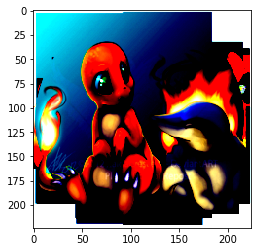

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


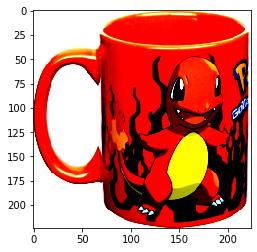

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


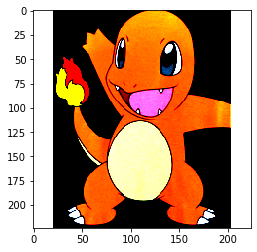

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


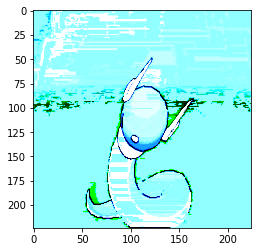

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dratini


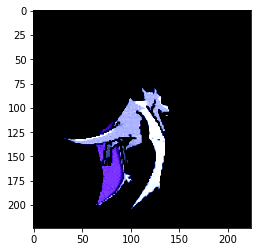

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Aerodactyl


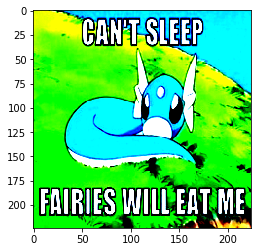

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Bulbasaur


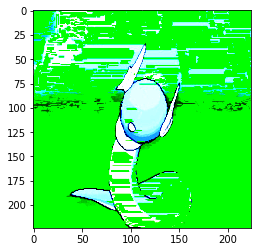

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dratini


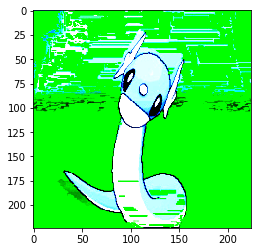

Dratini


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


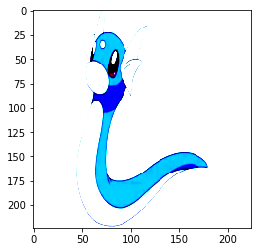

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dratini


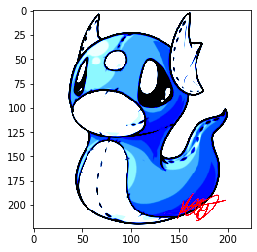

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


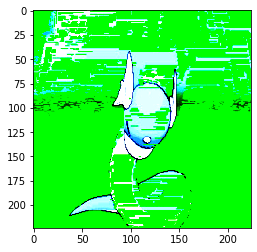

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dratini


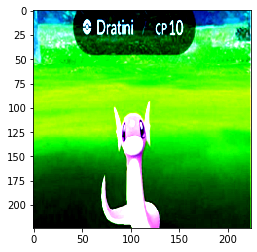

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dratini


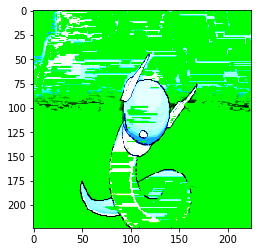

Dratini


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


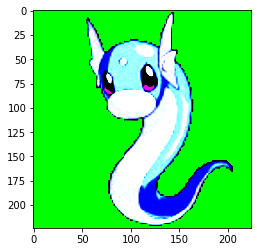

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dratini


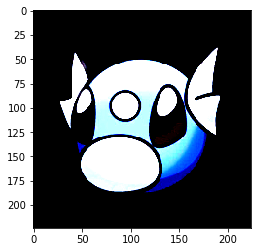

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Squirtle


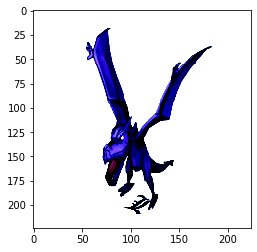

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Aerodactyl


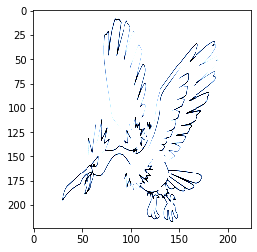

Fearow


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


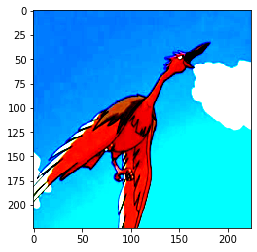

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


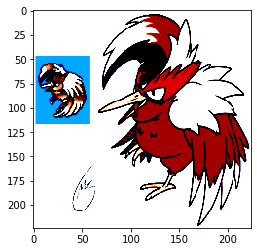

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


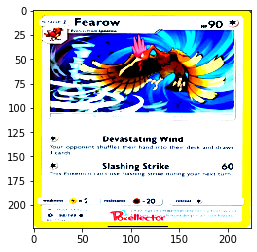

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


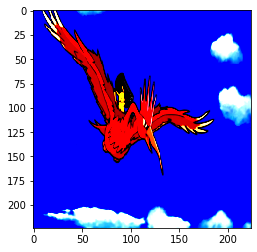

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


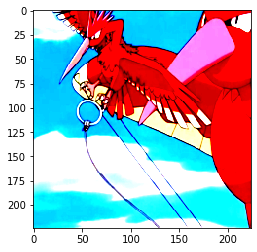

Fearow


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


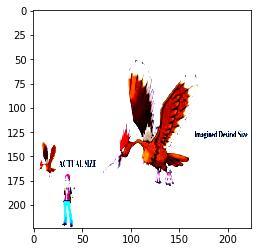

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


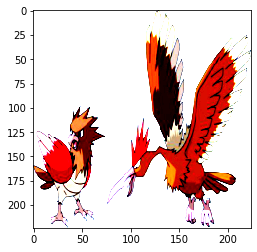

Fearow


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


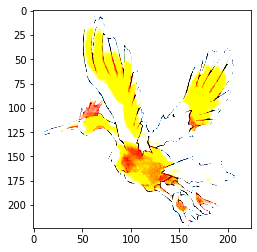

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


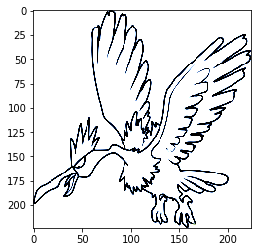

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


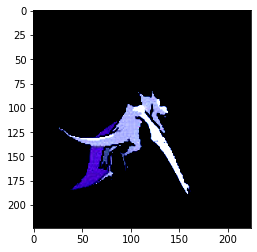

Aerodactyl


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


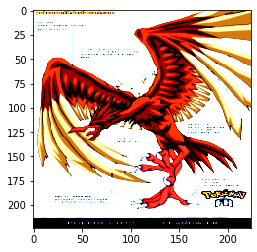

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


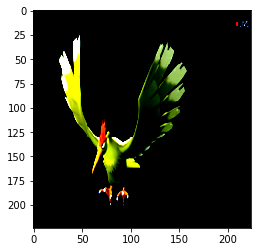

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


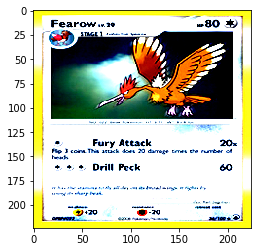

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Fearow


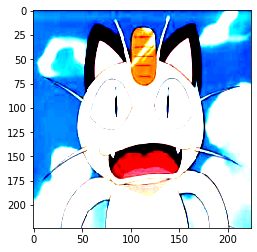

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mewtwo


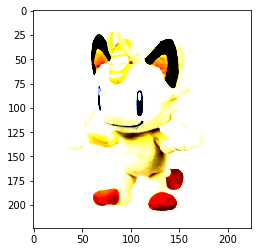

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mewtwo


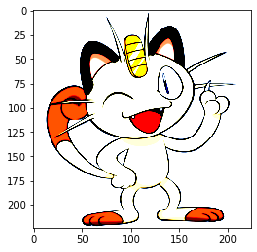

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mewtwo


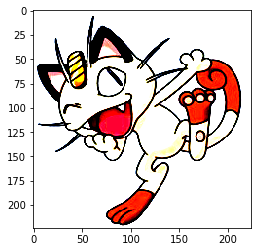

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mewtwo


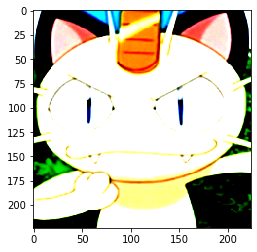

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Mewtwo


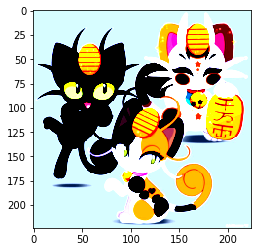

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Charmander


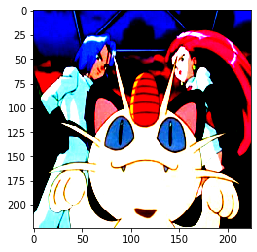

Mewtwo


In [149]:
alex_net.eval()
predictions = {}
for i,data in enumerate(test_loader,0):
    inputs,_ = data
    
    pred_outputs = alex_net(inputs)
    _, pred = torch.max(pred_outputs.data, 1)
    
    sample_fname, _ = test_loader.dataset.samples[i]
    predictions[sample_fname[14:]] = pred.item()
    
    imshow(torchvision.utils.make_grid(inputs))
    print(classes[pred.item()])
    
    

In [150]:
len(predictions)

187

## It is seen that the model is able to recognize pokemons quite well on test data

In [151]:
predictions

{'test_0.jpg': 0,
 'test_1.jpg': 0,
 'test_10.jpg': 1,
 'test_100.jpg': 6,
 'test_101.jpg': 6,
 'test_102.jpg': 6,
 'test_103.jpg': 6,
 'test_104.jpg': 6,
 'test_105.jpg': 6,
 'test_106.jpg': 6,
 'test_107.jpg': 6,
 'test_108.jpg': 1,
 'test_109.jpg': 6,
 'test_11.jpg': 1,
 'test_110.jpg': 6,
 'test_111.jpg': 6,
 'test_112.jpg': 6,
 'test_113.jpg': 6,
 'test_114.jpg': 6,
 'test_115.jpg': 6,
 'test_116.jpg': 6,
 'test_117.jpg': 6,
 'test_118.jpg': 6,
 'test_119.jpg': 6,
 'test_12.jpg': 1,
 'test_120.jpg': 6,
 'test_121.jpg': 6,
 'test_122.jpg': 6,
 'test_123.jpg': 6,
 'test_124.jpg': 6,
 'test_125.jpg': 6,
 'test_126.jpg': 6,
 'test_127.jpg': 6,
 'test_128.jpg': 6,
 'test_129.jpg': 6,
 'test_13.jpg': 1,
 'test_130.jpg': 7,
 'test_131.jpg': 7,
 'test_132.jpg': 7,
 'test_133.jpg': 7,
 'test_134.jpg': 7,
 'test_135.jpg': 9,
 'test_136.jpg': 7,
 'test_137.jpg': 7,
 'test_138.jpg': 7,
 'test_139.jpg': 7,
 'test_14.jpg': 1,
 'test_140.jpg': 7,
 'test_141.jpg': 6,
 'test_142.jpg': 7,
 'test_14

In [152]:
import pandas as pd

In [156]:
result = pd.DataFrame(list(predictions.items()),columns=['Name','Class'])
result.to_csv('poke_dex_result_1',index=False)

In [158]:
result

Name  Class
0      test_0.jpg      0
1      test_1.jpg      0
2     test_10.jpg      1
3    test_100.jpg      6
4    test_101.jpg      6
..            ...    ...
182   test_95.jpg      5
183   test_96.jpg      5
184   test_97.jpg      5
185   test_98.jpg      2
186   test_99.jpg      5

[187 rows x 2 columns]